In [2]:
from tensorflow.python.client import device_lib
for d in device_lib.list_local_devices():
    print(d.name, d.physical_device_desc)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/device:CPU:0 
/device:GPU:0 device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1b.0, compute capability: 7.0
/device:GPU:1 device: 1, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1c.0, compute capability: 7.0
/device:GPU:2 device: 2, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1d.0, compute capability: 7.0
/device:GPU:3 device: 3, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0


In [3]:
from keras import backend as K
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

Using TensorFlow backend.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pixiedust
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras import optimizers
import keras.backend as K
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from keras.datasets import fashion_mnist, mnist, cifar100

np.set_printoptions(suppress=True)
%matplotlib inline

Pixiedust database opened successfully


In [5]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [6]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [7]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [8]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 100))

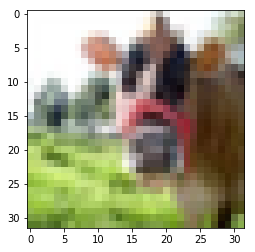

In [9]:
img = x_train[0]
plt.imshow(img);

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [11]:
input_shape = (32, 32, 3)

In [12]:
model = Sequential()

model.add(Conv2D(128, (3,3), activation='relu', input_shape=input_shape, name='L0'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256, (3,3), activation='relu', name='L1'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(512, (3,3), activation='relu', name='L2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())         
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.2))                  
model.add(Dense(100, activation='softmax'))

opt = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L0 (Conv2D)                  (None, 30, 30, 128)       3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
L1 (Conv2D)                  (None, 13, 13, 256)       295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
L2 (Conv2D)                  (None, 4, 4, 512)         1180160   
__________

In [13]:
model.get_layer('L0').get_config()

{'name': 'L0',
 'trainable': True,
 'batch_input_shape': (None, 32, 32, 3),
 'dtype': 'float32',
 'filters': 128,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [14]:
history = model.fit(x_train, y_train, epochs=30, batch_size=16, verbose=2, validation_split=0.3, shuffle=True)

Train on 35000 samples, validate on 15000 samples
Epoch 1/30
 - 17s - loss: 4.1501 - acc: 0.1027 - val_loss: 4.2456 - val_acc: 0.1025
Epoch 2/30
 - 16s - loss: 3.6658 - acc: 0.1568 - val_loss: 4.3302 - val_acc: 0.1382
Epoch 3/30
 - 16s - loss: 3.4878 - acc: 0.1916 - val_loss: 4.0482 - val_acc: 0.1668
Epoch 4/30
 - 16s - loss: 3.3049 - acc: 0.2212 - val_loss: 3.4504 - val_acc: 0.2150
Epoch 5/30
 - 16s - loss: 3.0804 - acc: 0.2569 - val_loss: 3.0848 - val_acc: 0.2627
Epoch 6/30
 - 16s - loss: 2.8347 - acc: 0.2989 - val_loss: 3.3013 - val_acc: 0.2289
Epoch 7/30
 - 16s - loss: 2.6064 - acc: 0.3393 - val_loss: 3.1583 - val_acc: 0.2929
Epoch 8/30
 - 16s - loss: 2.3795 - acc: 0.3827 - val_loss: 3.1331 - val_acc: 0.2993
Epoch 9/30
 - 16s - loss: 2.1546 - acc: 0.4325 - val_loss: 3.1326 - val_acc: 0.3200
Epoch 10/30
 - 16s - loss: 1.9356 - acc: 0.4805 - val_loss: 2.8338 - val_acc: 0.3672
Epoch 11/30
 - 16s - loss: 1.7214 - acc: 0.5309 - val_loss: 3.0196 - val_acc: 0.3479
Epoch 12/30
 - 16s - los

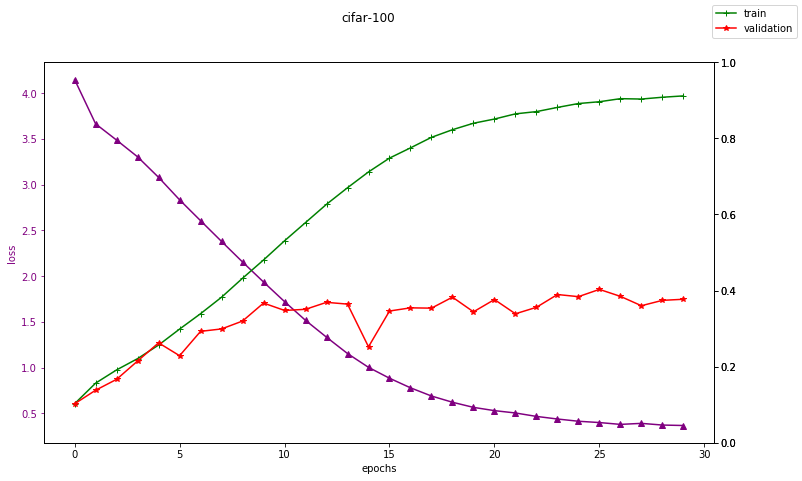

In [17]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(history.epoch, history.history['acc'], marker='+', color='green', label='train')
ax2.set_ylim(0,1)

ax3 = ax1.twinx()
plt.plot(history.epoch, history.history['val_acc'], marker='*', color='red', label='validation')
ax3.set_ylim(0,1)

fig.suptitle('cifar-100');
fig.legend();